In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# 경제지표 데이터 가져오기

stock_data = pd.read_excel('index_Infomation_v0.2.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head()

,Date,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,samsung_ROE,apple_PER,apple_PBR,...,중앙은행 기준금리,생산자물가지수,수입물가지수,소비자물가지수,수입,수출,경상수지,소비자심리지수,기업경기실사지수,foreign_exchange_reserves
0,2014-01-02,4143.069824,1831.979980,16441.349609,1967.19,8.50,1.90,0.223529,2.707603,4.225919,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
1,2014-01-03,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
2,2014-01-04,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
3,2014-01-05,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
4,2014-01-06,4113.680176,1826.770020,16425.099609,1953.28,8.49,1.90,0.223793,2.662568,4.155630,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"


In [3]:
# 필요 데이터 가져오기

df = stock_data[['Date', 'samsung_Close', 'M2 통화공급 (말잔)', 'M2 통화공급 (평잔)', '생산자물가지수', '수입물가지수', '소비자물가지수']]
df

,Date,samsung_Close,M2 통화공급 (말잔),M2 통화공급 (평잔),생산자물가지수,수입물가지수,소비자물가지수
0,2014-01-02,26180,1946307.2,1937045.6,101.57,123.71,93.73
1,2014-01-03,25920,1946307.2,1937045.6,101.57,123.71,93.73
2,2014-01-04,25920,1946307.2,1937045.6,101.57,123.71,93.73
3,2014-01-05,25920,1946307.2,1937045.6,101.57,123.71,93.73
4,2014-01-06,26140,1946307.2,1937045.6,101.57,123.71,93.73
...,...,...,...,...,...,...,...
3828,2024-06-26,81300,4009360.8,4008655.8,119.19,142.76,113.84
3829,2024-06-27,81600,4009360.8,4008655.8,119.19,142.76,113.84
3830,2024-06-28,81500,4009360.8,4008655.8,119.19,142.76,113.84
3831,2024-06-29,81500,4009360.8,4008655.8,119.19,142.76,113.84


In [4]:
compare1 = "samsung"  # samsung, apple
compare2 = "IPI"
compare2data = "수입물가지수"

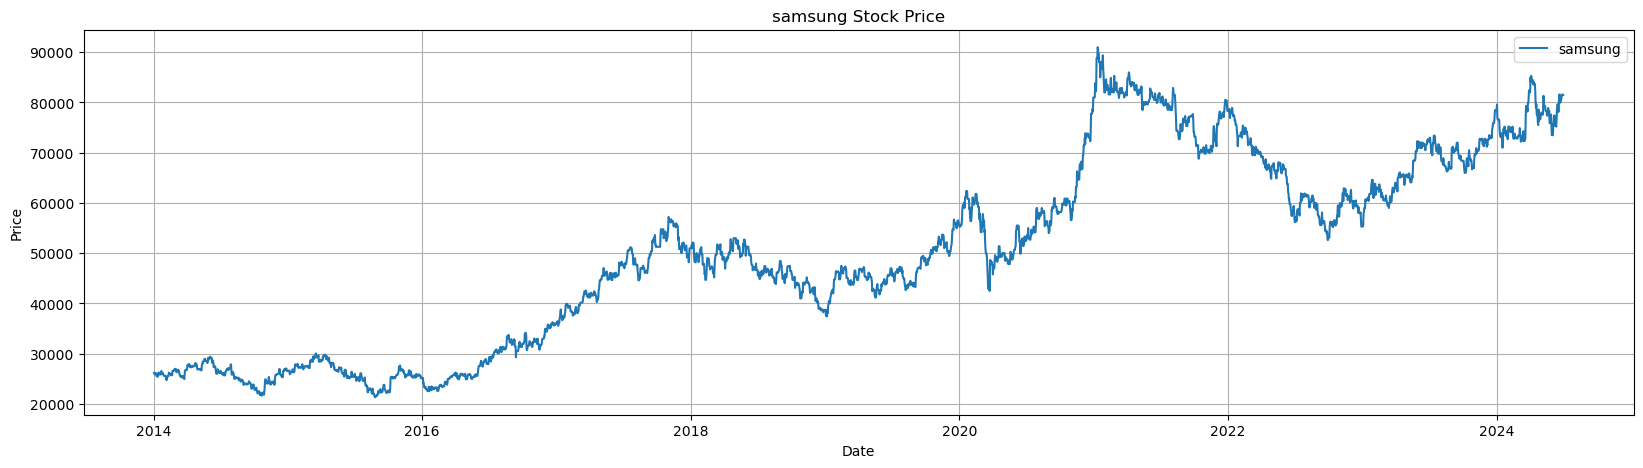

In [5]:
# 삼성전자 주식 그래프 그리기

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')

plt.title(f'{compare1} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

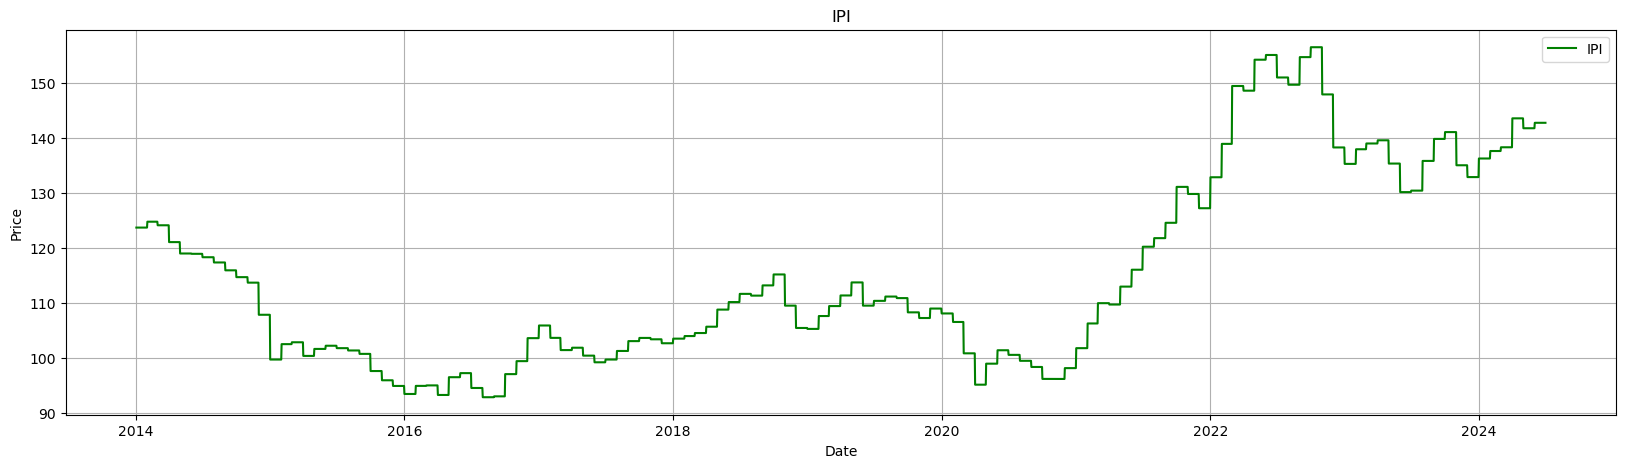

In [6]:
# 경제지표 그래프 그리기

plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}', color = 'green')

plt.title(f'{compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

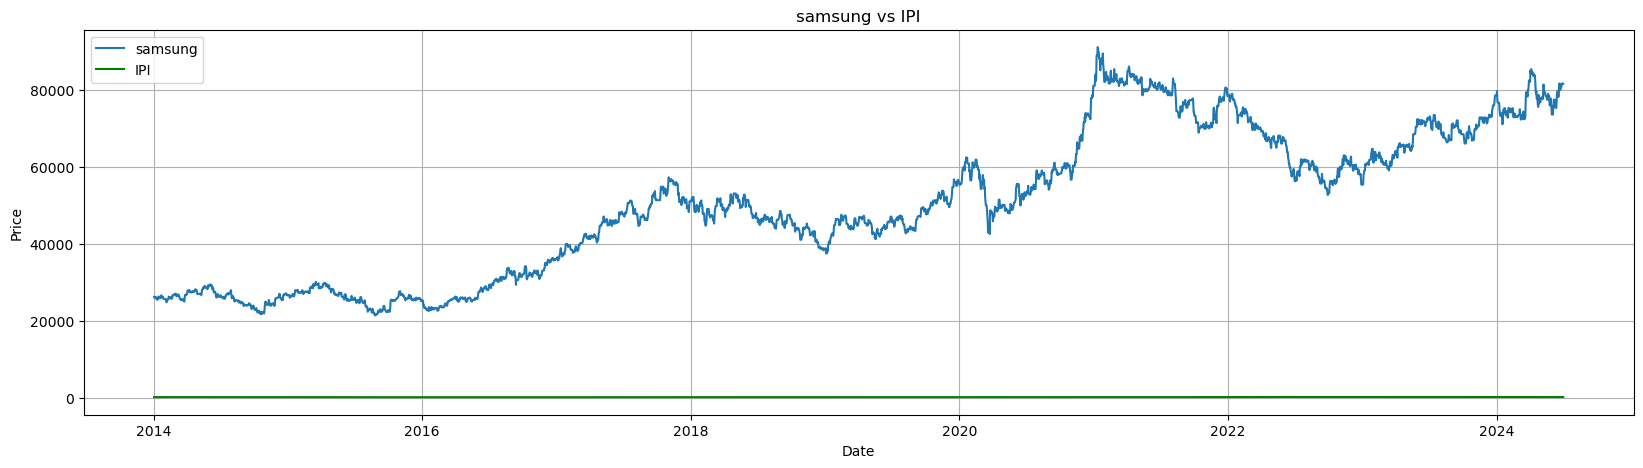

In [7]:
# vs 그래프 그리기

plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}', color='green')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [8]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [9]:
compare1_normalize = normalize(df, f'{compare1}_Close')
compare2_normalize = normalize(df, f'{compare2data}')

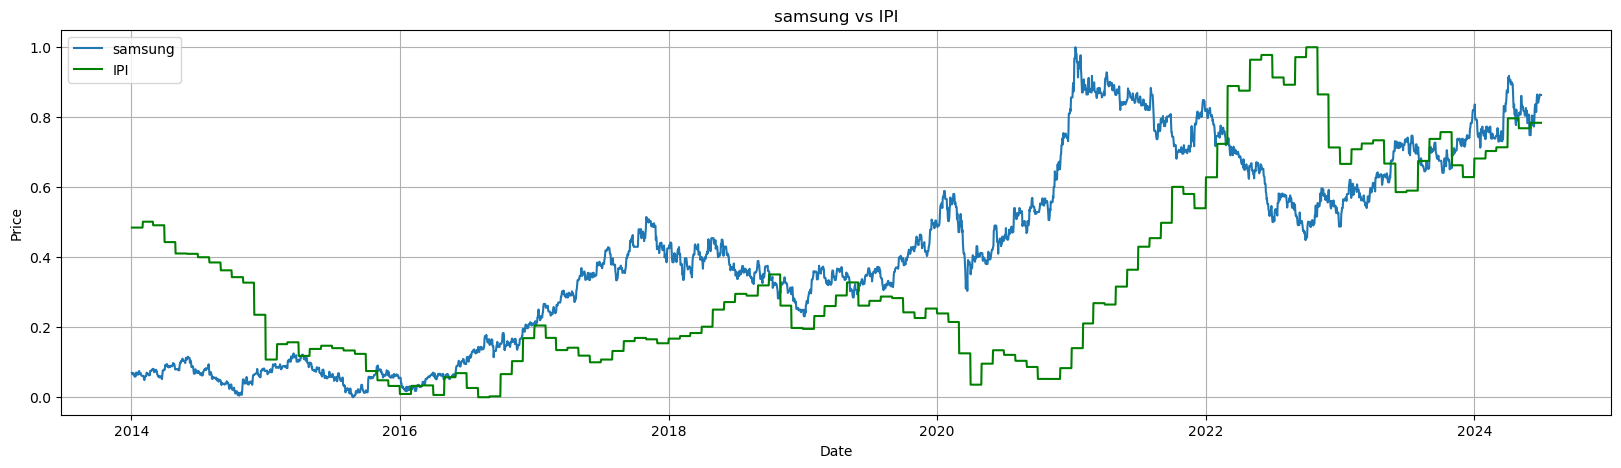

In [10]:
# 정규화 적용 vs 그래프

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], compare1_normalize, label=f'{compare1}')
plt.plot(df['Date'], compare2_normalize, label=f'{compare2}', color='green')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [11]:
# 변동율 차이 비교
compare1_daily_change = df[f'{compare1}_Close'].pct_change()
compare2_daily_change = df[f'{compare2data}'].pct_change()

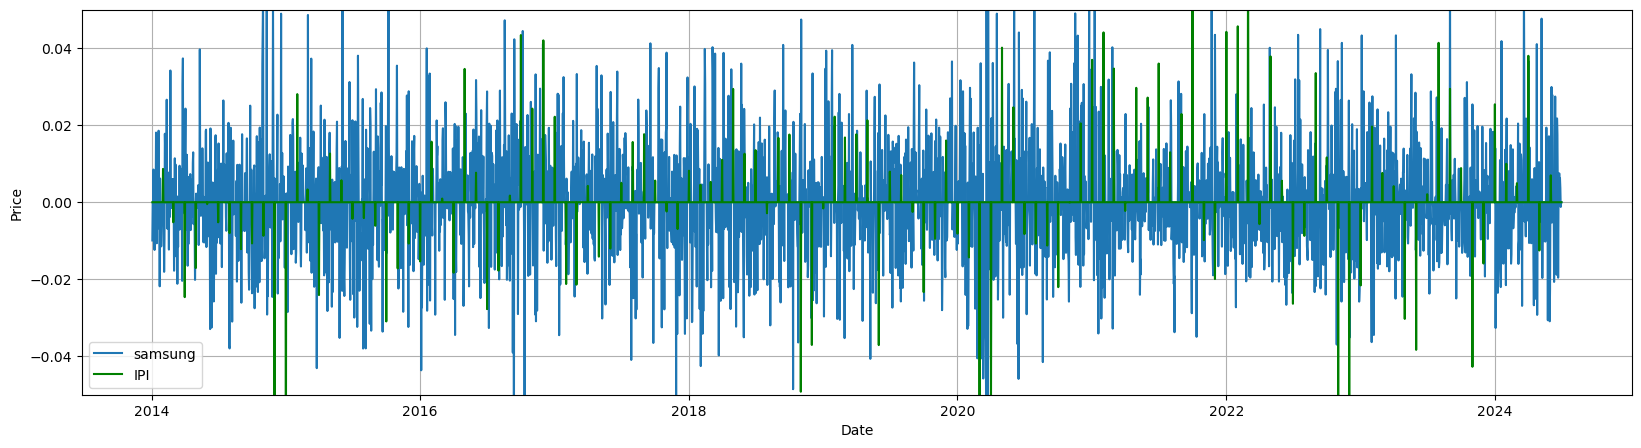

In [12]:
#그래프화
plt.figure(figsize=(20,5))
plt.plot(df['Date'], compare1_daily_change, label=f'{compare1}')
plt.plot(df['Date'], compare2_daily_change, label=f'{compare2}', color='green')
plt.ylim(-0.05, 0.05)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


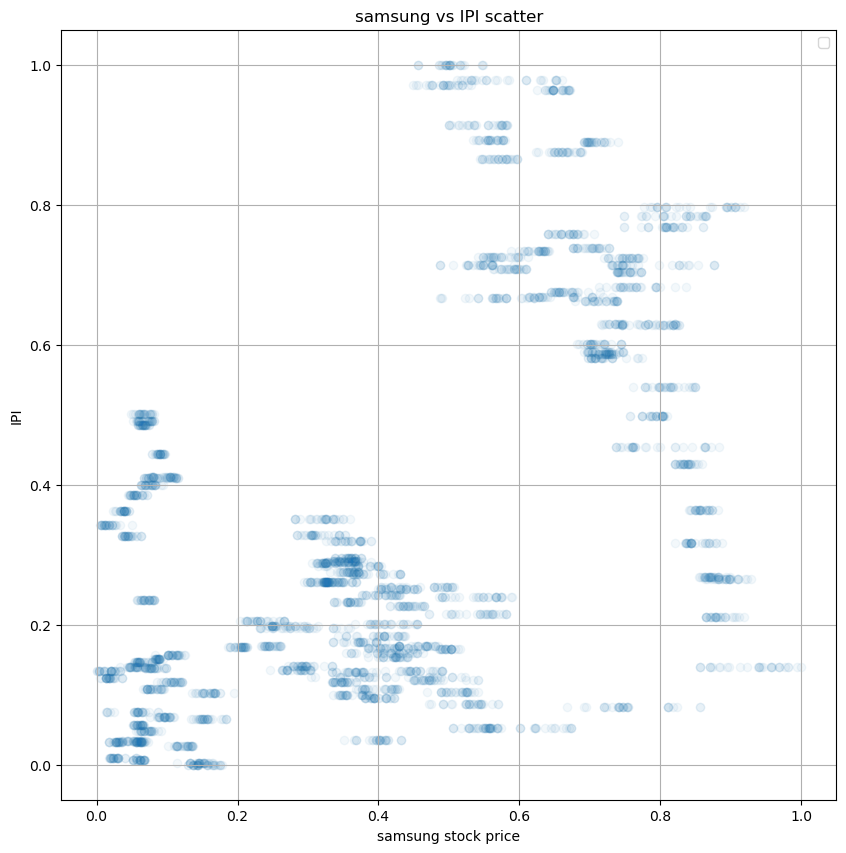

In [13]:
# 정규화 데이터로 산점도 그래프
plt.figure(figsize=(10,10))
plt.scatter(compare1_normalize, compare2_normalize, alpha=0.05)

plt.title(f'{compare1} vs {compare2} scatter')
plt.xlabel(f'{compare1} stock price')
plt.ylabel(f'{compare2}')
plt.legend()
plt.grid(True)

plt.show()

In [14]:
# Calculate the correlation
correlation = df[f'{compare2data}'].corr(df[f'{compare1}_Close'])
print(f"Correlation between {compare2} and {compare1} Stock Price: {correlation:.2f}")

Correlation between IPI and samsung Stock Price: 0.54
